In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps
sns.set()

In [42]:
# days with k homicides in UK
zeros = np.array([0] * 259)
ones = np.array([1] * 387)
twos = np.array([2] * 261)
threes = np.array([3] * 131)
fours = np.array([4] * 40)
fives = np.array([5] * 13)
six = np.array([6] * 3)

data = np.concatenate([zeros,ones,twos,threes,fours,fives,six])


In [43]:
data_mean = data.mean()
data_std = data.std()
print (data_mean)
print (data_std)

1.4122486288848264
1.171366125502726


In [44]:
samples = pm.rpoisson(data_mean,100000)

[24570 34411 24101 11438  4000  1140   273    55    10     2]
[ 0  1  2  3  4  5  6  7  8  9 10] [259 387 261 131  40  13   3   0   0   0]
[259 387 261 131  40  13   3   0   0   0]


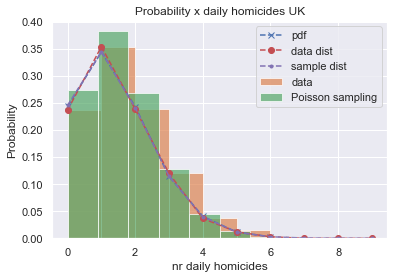

In [45]:
counts,bins = np.histogram(data,bins=range(0,11))
sample_counts,sample_bins=np.histogram(samples,bins=range(0,11))
print (sample_counts)
norm_sample_counts = sample_counts / sample_counts.sum()

x = range(7)
y = sps.poisson.pmf(x,data_mean)
plt.title('Probability x daily homicides UK')
plt.plot(x,y,'x--',label='pdf')
plt.hist(data,bins=6,density=True,alpha=0.7,label='data')
plt.hist(samples,bins=10,density=True,alpha=0.7,label='Poisson sampling')
print (bins,counts)
norm_counts = counts / counts.sum()
print (counts)
plt.plot(range(len(norm_counts)),norm_counts,'o--',label='data dist')
plt.plot(range(len(norm_sample_counts)),norm_sample_counts,'.--',label='sample dist')
plt.ylabel('Probability')
plt.xlabel('nr daily homicides')
plt.legend(loc='upper right')

In [46]:
scb = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7])
scb.index = pd.date_range('2020-01-01','2020-12-31')
#scb.drop(pd.Timestamp('2020-02-29'),inplace=True)
scb

,2015,2016,2017,2018,2019,2020,2015-2019
2020-01-01,295,245,339,275,300,254,291
2020-01-02,272,272,317,312,276,300,290
2020-01-03,281,293,310,295,271,256,290
2020-01-04,256,260,305,285,282,272,278
2020-01-05,268,260,304,291,275,265,280
...,...,...,...,...,...,...,...
2020-12-27,227,249,271,240,238,0,245
2020-12-28,274,262,273,261,215,0,257
2020-12-29,292,274,276,263,244,0,270
2020-12-30,283,307,275,232,226,0,265


In [47]:
scb.loc[:,:'2019'].sum()

2015    89947
2016    89019
2017    89742
2018    89672
2019    86150
dtype: int64

In [48]:
last_data_day = scb.loc[scb['2020'] == 0]
last_data_day = last_data_day.iloc[0].name
last_data_day = last_data_day - pd.DateOffset(days=1)
last_data_day

Timestamp('2020-06-18 00:00:00')

In [49]:
cumulative_until_last_day = scb[:last_data_day].sum()
cumulative_until_last_day['2020'] / cumulative_until_last_day['2015-2019']

1.0692973570310342

In [50]:
scb_weekly = scb.resample('W-TUE').sum()
print(scb_weekly.loc[:last_data_day].sum())
(scb_weekly.loc[:last_data_day,'2020'] - scb_weekly.loc[:last_data_day,'2015-2019']).sum()

2015         43999
2016         42077
2017         43558
2018         43718
2019         40610
2020         46399
2015-2019    42990
dtype: int64


3409

In [51]:
scb_weekly

,2015,2016,2017,2018,2019,2020,2015-2019
2020-01-07,1937,1846,2192,1998,1965,1879,1989
2020-01-14,1954,1904,2109,1941,1802,1866,1943
2020-01-21,1937,1969,2088,1945,1832,1789,1955
2020-01-28,1929,1977,1922,1928,1807,1794,1913
2020-02-04,1966,1931,1913,1854,1871,1794,1908
2020-02-11,1918,1913,1833,1983,1847,1771,1899
2020-02-18,2050,1783,2004,2024,1754,1822,1923
2020-02-25,2149,1874,2071,2116,1850,1774,2012
2020-03-03,1743,1806,1751,1877,1494,1751,1928
2020-03-10,2028,1897,1873,2221,1690,1831,1941


In [77]:
scb_monthly = scb.resample('M').sum()
scb_monthly['delta'] = scb['2020'] - scb['2015-2019']
scb_monthly['cumdelta'] = (scb['2020'] - scb['2015-2019']).cumsum()
# last of feb not correct for delta - leap year
scb_monthly

,2015,2016,2017,2018,2019,2020,2015-2019,delta,cumdelta
2020-01-31,8637,8548,9101,8578,8174,8118,8611,-18,-493
2020-02-29,8067,7672,7875,8151,7294,7360,8007,1,-1140
2020-03-31,8619,8009,8076,9210,7570,8361,8296,49,-1075
2020-04-30,7694,7406,7566,7615,7186,10357,7494,90,1788
2020-05-31,7311,6991,7332,6778,6972,8668,7075,35,3381
2020-06-30,6767,6542,6655,6499,6452,3582,6584,-222,379
2020-07-31,7036,7084,6778,7259,6723,0,6973,-231,-6594
2020-08-31,6712,7005,6824,6791,6829,0,6831,-227,-13425
2020-09-30,6916,6728,6762,6803,6674,0,6776,-226,-20201
2020-10-31,7147,7357,7415,7276,7338,0,7309,-249,-27510


In [53]:
data = scb_weekly.iloc[:,0:5]
#data = data.iloc[:9]
data.mean(axis=1)
data

,2015,2016,2017,2018,2019
2020-01-07,1937,1846,2192,1998,1965
2020-01-14,1954,1904,2109,1941,1802
2020-01-21,1937,1969,2088,1945,1832
2020-01-28,1929,1977,1922,1928,1807
2020-02-04,1966,1931,1913,1854,1871
2020-02-11,1918,1913,1833,1983,1847
2020-02-18,2050,1783,2004,2024,1754
2020-02-25,2149,1874,2071,2116,1850
2020-03-03,1743,1806,1751,1877,1494
2020-03-10,2028,1897,1873,2221,1690


In [54]:
data_min = data.min(axis=1)
data_max = data.max(axis=1)

print (data.mean().mean())

1677.4716981132074


[1.55293046e-02 4.85029598e+02 1.16902537e+03 2.31435810e+03
 2.12331531e+04]


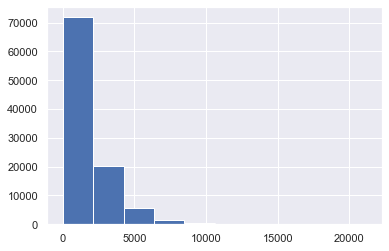

In [55]:
test_lambda = pm.rexponential(1/ data.mean().mean(),100000)
plt.hist(test_lambda)
print (np.percentile(test_lambda,[0,25,50,75,100]))

In [56]:
walk = 50000
burnin = 20000
thin = 2


res_array = np.zeros((len(data),3))


for i in range(len(data)):
    print ('\n++++++++++++++++++++ processing day ++++++++++++++++++++', i)
    print (data.iloc[i,:])
    print (data.iloc[i,:].mean())
    
    lambda_ = pm.Exponential('lambda',1/ data.iloc[i,:].mean())
    lkh  = pm.Poisson('lkh',lambda_,observed=True,value=data.iloc[i,:])
    model = pm.Model([lambda_,lkh])
    mcmc = pm.MCMC(model)
    sample = mcmc.sample(walk,burnin,thin)
    post = mcmc.trace(lambda_)[:]   
        
    res_array[i,0] = post.min()
    res_array[i,1] = post.mean()
    res_array[i,2] = post.max()
                     
    


++++++++++++++++++++ processing day ++++++++++++++++++++ 0
2015    1937
2016    1846
2017    2192
2018    1998
2019    1965
Name: 2020-01-07 00:00:00, dtype: int64
1987.6
 [-----------------100%-----------------] 50000 of 50000 complete in 3.3 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 1
2015    1954
2016    1904
2017    2109
2018    1941
2019    1802
Name: 2020-01-14 00:00:00, dtype: int64
1942.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.5 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 2
2015    1937
2016    1969
2017    2088
2018    1945
2019    1832
Name: 2020-01-21 00:00:00, dtype: int64
1954.2
 [-----------------100%-----------------] 50000 of 50000 complete in 2.3 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 3
2015    1929
2016    1977
2017    1922
2018    1928
2019    1807
Name: 2020-01-28 00:00:00, dtype: int64
1912.6
 [-----------------100%-----------------] 50000 of 50000 complete in 1.9 sec
+++++++

 [-----------------100%-----------------] 50000 of 50000 complete in 2.7 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 33
2015    1574
2016    1555
2017    1591
2018    1486
2019    1542
Name: 2020-08-25 00:00:00, dtype: int64
1549.6
 [-----------------100%-----------------] 50000 of 50000 complete in 2.3 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 34
2015    1477
2016    1628
2017    1518
2018    1570
2019    1642
Name: 2020-09-01 00:00:00, dtype: int64
1567.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.3 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 35
2015    1628
2016    1650
2017    1584
2018    1632
2019    1441
Name: 2020-09-08 00:00:00, dtype: int64
1587.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.3 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 36
2015    1565
2016    1507
2017    1601
2018    1518
2019    1559
Name: 2020-09-15 00:00:00, dtype: int64
1550.0
 [--

In [57]:
res_array

array([[1900.26319275, 1987.42330045, 2065.81375802],
       [1871.70510425, 1942.09163963, 2014.2442947 ],
       [1875.24438478, 1954.58618308, 2032.06550188],
       [1840.6960184 , 1912.6680093 , 1998.3056802 ],
       [1829.17971886, 1906.95805167, 1989.67161809],
       [1821.83491986, 1898.48469371, 1967.67871367],
       [1850.36220502, 1923.36636083, 1993.11891798],
       [1930.34244989, 2011.9519416 , 2103.62478065],
       [1667.3990616 , 1734.33466861, 1831.32547527],
       [1875.65007899, 1941.99877758, 2006.04327011],
       [1807.36236098, 1881.48094022, 1962.26863411],
       [1746.89115321, 1812.82942366, 1888.67216394],
       [1730.16577891, 1809.50216022, 1886.32462522],
       [1740.49105801, 1822.6869605 , 1895.78963049],
       [1670.61828048, 1736.94076346, 1806.91322949],
       [1682.6622421 , 1747.20262135, 1818.64830716],
       [1652.37547066, 1717.80085206, 1786.07579201],
       [1592.66878725, 1662.47321979, 1748.19748113],
       [1565.27252209, 1628.

In [58]:
errors_low = np.abs(res_array[:,1] - res_array[:,0])
errors_low = errors_low[:-1]
errors_high = np.abs(res_array[:,1] - res_array[:,2]) 
errors_high = errors_high[:-1]
print (errors_low)
print (errors_high)

errors = np.array((errors_low,errors_high))
errors

[87.16010771 70.38653538 79.3417983  71.9719909  77.77833281 76.64977386
 73.0041558  81.60949172 66.93560701 66.34869859 74.11857924 65.93827046
 79.3363813  82.19590249 66.32248298 64.54037925 65.4253814  69.80443254
 63.40526078 67.68014252 61.5680359  60.86083247 66.96059474 69.76598659
 67.36831028 65.14337481 66.89702225 69.52095835 63.9277017  66.41239855
 65.87245564 69.09224246 60.95778169 64.16839874 65.01922756 62.68021024
 65.35162528 64.85377327 75.18746861 68.82023651 63.79836461 62.72919191
 64.59518193 64.21588934 77.95156827 83.94647679 75.04457968 66.06132541
 67.45184086 70.17170597 71.25242042 83.37345653]
[78.39045757 72.15265507 77.4793188  85.6376709  82.71356642 69.19401996
 69.75255715 91.67283905 96.99080666 64.04449253 80.78769389 75.84274028
 76.822465   73.10266998 69.97246602 71.44568581 68.27493995 85.72426134
 78.81012411 66.94052915 70.95016823 69.12884886 68.92111654 67.25013194
 73.12069951 67.31729227 74.043579   63.70524544 69.98580073 65.55723344
 

array([[87.16010771, 70.38653538, 79.3417983 , 71.9719909 , 77.77833281,
        76.64977386, 73.0041558 , 81.60949172, 66.93560701, 66.34869859,
        74.11857924, 65.93827046, 79.3363813 , 82.19590249, 66.32248298,
        64.54037925, 65.4253814 , 69.80443254, 63.40526078, 67.68014252,
        61.5680359 , 60.86083247, 66.96059474, 69.76598659, 67.36831028,
        65.14337481, 66.89702225, 69.52095835, 63.9277017 , 66.41239855,
        65.87245564, 69.09224246, 60.95778169, 64.16839874, 65.01922756,
        62.68021024, 65.35162528, 64.85377327, 75.18746861, 68.82023651,
        63.79836461, 62.72919191, 64.59518193, 64.21588934, 77.95156827,
        83.94647679, 75.04457968, 66.06132541, 67.45184086, 70.17170597,
        71.25242042, 83.37345653],
       [78.39045757, 72.15265507, 77.4793188 , 85.6376709 , 82.71356642,
        69.19401996, 69.75255715, 91.67283905, 96.99080666, 64.04449253,
        80.78769389, 75.84274028, 76.822465  , 73.10266998, 69.97246602,
        71.44568

In [59]:

excess = scb_weekly.loc[:last_data_day,'2020'] - scb_weekly.loc[:last_data_day,'2015-2019']
current_excess = excess.cumsum()
current_excess

2020-01-07    -110
2020-01-14    -187
2020-01-21    -353
2020-01-28    -472
2020-02-04    -586
2020-02-11    -714
2020-02-18    -815
2020-02-25   -1053
2020-03-03   -1230
2020-03-10   -1340
2020-03-17   -1440
2020-03-24   -1370
2020-03-31   -1075
2020-04-07    -454
2020-04-14     368
2020-04-21    1075
2020-04-28    1615
2020-05-05    2192
2020-05-12    2710
2020-05-19    3052
2020-05-26    3324
2020-06-02    3467
2020-06-09    3567
2020-06-16    3409
Freq: W-TUE, dtype: int64

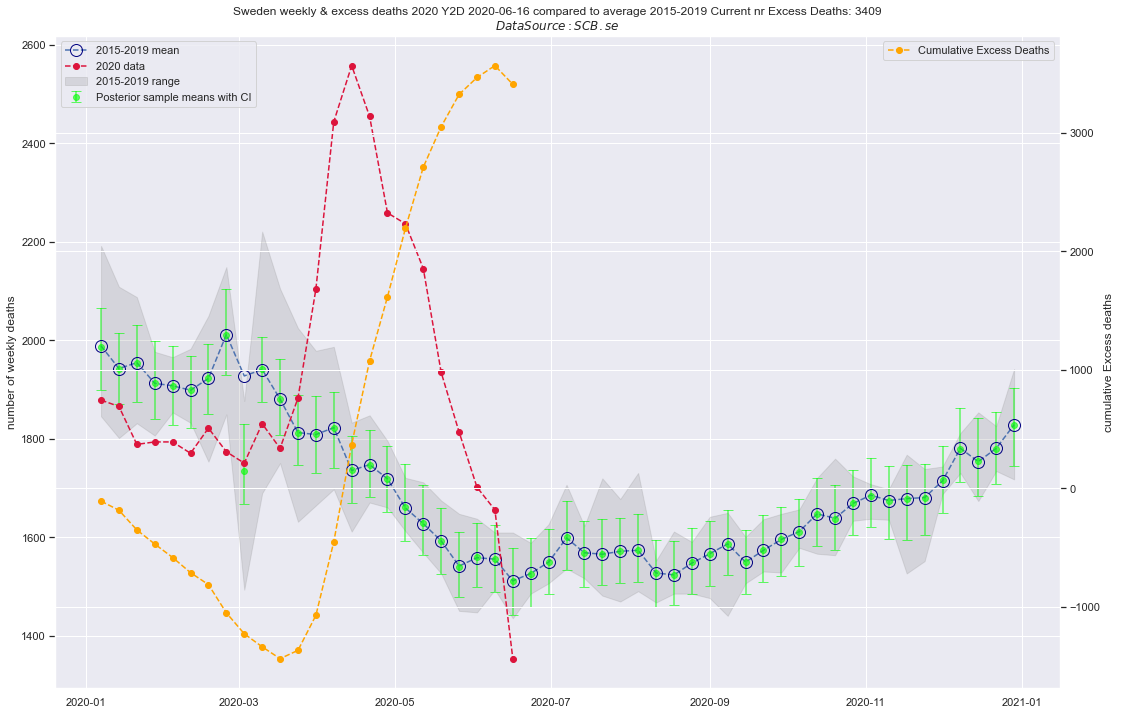

In [80]:
plt.figure(figsize=(18,12))
plt.title('Sweden weekly & excess deaths 2020 Y2D '\
          '{} compared to average 2015-2019 Current nr Excess Deaths: {}\n$Data Source: SCB.se$'.format(excess.index[-1].date(),current_excess[-1]))
ax = plt.gca()
ax2 = plt.twinx()

ax.errorbar(scb_weekly.index[:len(data) - 1],res_array[:-1,1],yerr=errors,
             fmt='o',capsize=5,color='lime',alpha=0.6,label='Posterior sample means with CI')

ax.plot(scb_weekly.index[:len(data) -1],scb_weekly['2015-2019'][:-1],'o--',
        markerfacecolor='none',markeredgecolor='navy',markersize=12,
        label='2015-2019 mean')

ax.plot(scb_weekly[:last_data_day].index,scb_weekly.loc[:last_data_day,'2020'],'o--',
         color='crimson',label='2020 data')

ax.fill_between(scb_weekly.index[:len(data) -1],y1=data_min[:-1],y2=data_max[:-1],color='grey',
                 alpha=0.2,label='2015-2019 range')

ax2.plot(excess.index,excess.cumsum(),'o--',ls='dashed',color='orange',label='Cumulative Excess Deaths')
ax.set_ylabel('number of weekly deaths')
ax2.set_ylabel('cumulative Excess deaths')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('scb_poisson_weekly.jpg',format='jpg')

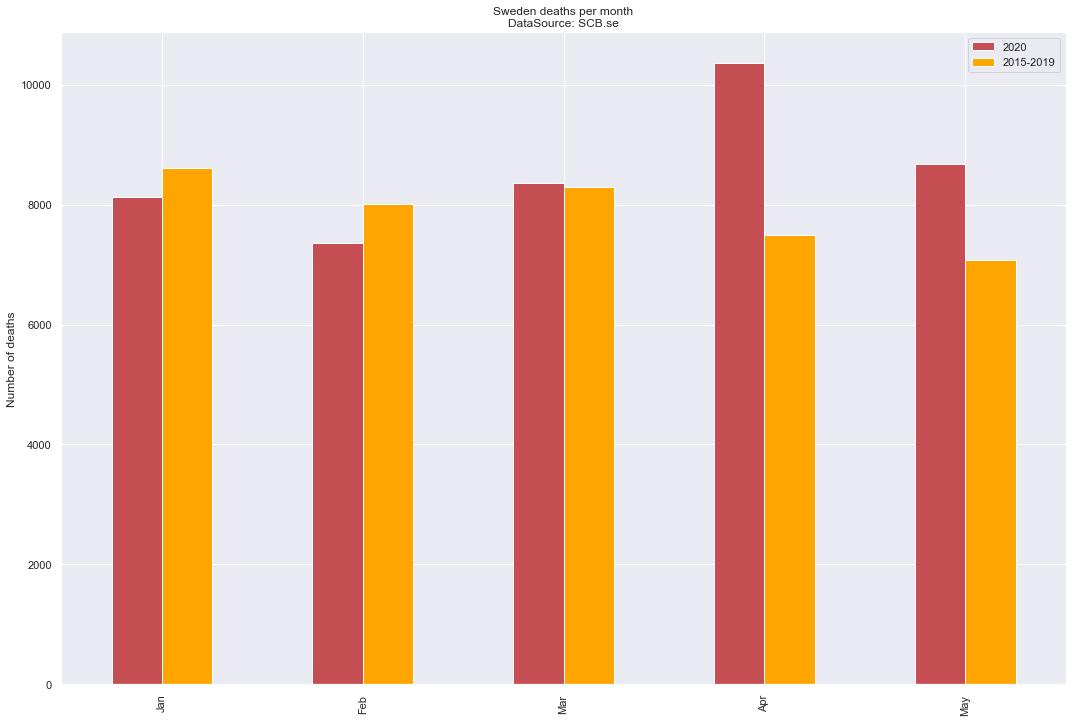

In [76]:
#scb_monthly.index = scb_monthly.index.date
scb_monthly[['2020','2015-2019']][:pd.Timestamp('2020-05-31')].plot.bar(color=['r','orange'],
                                                                        title='Sweden deaths per month\nDataSource: SCB.se',figsize=(18,12))
plt.ylabel('Number of deaths')
plt.xticks(range(len(scb_monthly[:pd.Timestamp('2020-05-31')])),['Jan','Feb','Mar','Apr','May'])
plt.savefig('scb_monthly_deaths.jpg',format='jpg')